In [2]:
import xarray as xr
from virtualizarr import open_virtual_dataset

In [5]:
urls = [
    "https://thredds.climate.ncsu.edu/thredds/fileServer/prism/daily/combo/2004/PRISM_combo_20040101.nc",
    "https://thredds.climate.ncsu.edu/thredds/fileServer/prism/daily/combo/2004/PRISM_combo_20040201.nc",
    "https://thredds.climate.ncsu.edu/thredds/fileServer/prism/daily/combo/2004/PRISM_combo_20040301.nc",
    "https://thredds.climate.ncsu.edu/thredds/fileServer/prism/daily/combo/2004/PRISM_combo_20040401.nc",
]
vds = open_virtual_dataset(urls[1])

AttributeError: 'NoneType' object has no attribute 'File'

In [3]:
data_http = xr.open_zarr("http://127.0.0.1:8000/")
data_http

<xarray.Dataset> Size: 1GB
Dimensions:    (latitude: 621, longitude: 1405, t: 50)
Coordinates:
  * latitude   (latitude) float64 5kB 49.92 49.88 49.83 ... 24.17 24.12 24.08
  * longitude  (longitude) float64 11kB -125.0 -125.0 -124.9 ... -66.54 -66.5
  * t          (t) datetime64[ns] 400B 2001-01-07 2001-01-03 ... 2019-01-04
Data variables:
    ppt        (t, latitude, longitude) float64 349MB ...
    tmax       (t, latitude, longitude) float64 349MB ...
    tmean      (t, latitude, longitude) float64 349MB ...
    tmin       (t, latitude, longitude) float64 349MB ...
Attributes:
    DODS_EXTRA.Unlimited_Dimension:  t

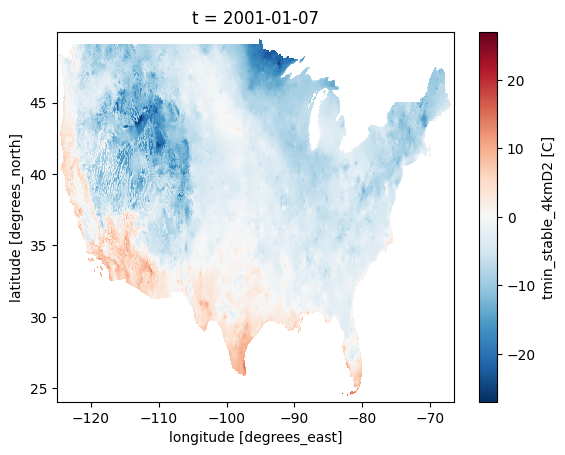

In [6]:
data_http["tmin"].isel(t=0).plot()

In [7]:
la_data = data_http["tmin"].sel(latitude=34.0522, longitude=-118.2437, method="nearest")

In [11]:
la_data.sum(dim="t")

<xarray.DataArray 'tmin' ()> Size: 8B
array(390.42699885)
Coordinates:
    latitude   float64 8B 34.04
    longitude  float64 8B -118.2

In [12]:
data = zarr.open("http://127.0.0.1:8000/")

In [14]:
xr.open_zarr(data)

ValueError: unrecognized engine 'zarr' must be one of your download engines: ['store']. To install additional dependencies, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html